<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Machine_Learning/blob/main/ML_P07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Practical No. 07</h1>
Bagging & Boosting Algorithm

In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#load Dataset
file_path = '/content/drive/MyDrive/6TH SEM/Machine Learning Lab/diabetes.csv'
df = pd.read_csv(file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Preprocessing
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [63]:

X = df.drop(['Pregnancies', 'BloodPressure', 'Outcome'], axis=1)
y = df['Outcome']

In [53]:
#Split data into 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Intialize Model
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)

#Train Model
model_1.fit(X_train, y_train)

#Make Predictions
y_pred = model_1.predict(X_test)

Accuracy:  0.7532467532467533
Confusion Matrix: 
 [[122  29]
 [ 28  52]]


<Axes: >

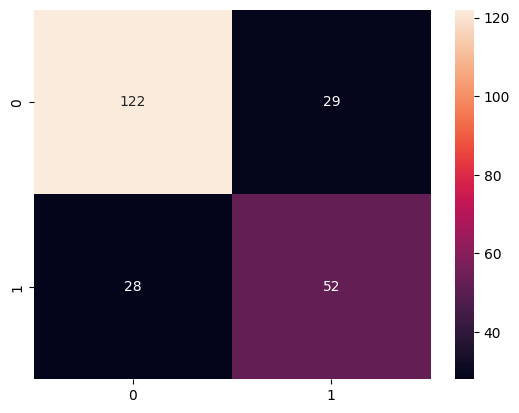

In [54]:
#Acuuracy of model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

#Visualize Consusion Matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')



In [55]:
#Initialize gradient bossting classifier
from sklearn.ensemble import GradientBoostingClassifier

model_2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)


Accuracy:  0.7359307359307359
Confusion Matrix: 
 [[118  33]
 [ 28  52]]


<Axes: >

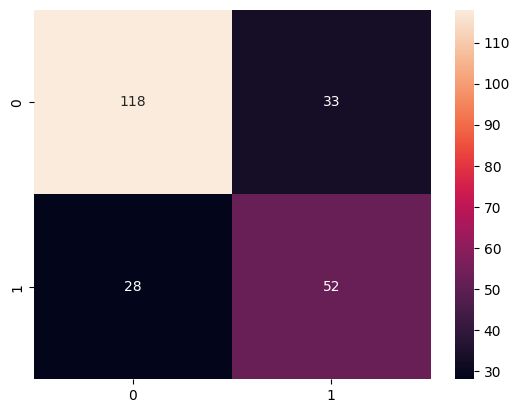

In [56]:
#Accuracy of the model
acc_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy: ", acc_2)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix: \n", cm_2)

#visualize the confusion matrix
import seaborn as sns
sns.heatmap(cm_2, annot=True, fmt = 'd')



In [57]:
#initialize adabust algorithm
from sklearn.ensemble import AdaBoostClassifier
model_3 = AdaBoostClassifier(n_estimators=100, random_state=42)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)


Accuracy:  0.7489177489177489
Confusion Matrix: 
 [[122  29]
 [ 29  51]]


<Axes: >

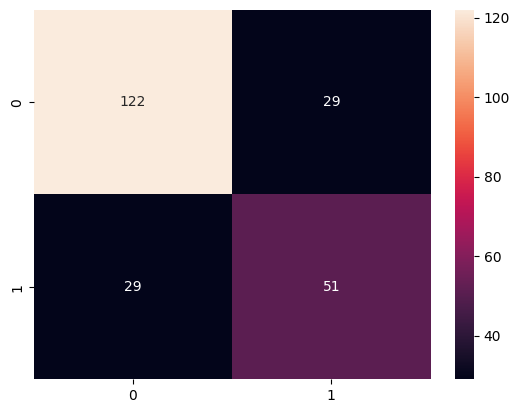

In [58]:
#Accuracy of the model
acc_3 = accuracy_score(y_test, y_pred_3)
print("Accuracy: ", acc_3)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_3 = confusion_matrix(y_test, y_pred_3)
print("Confusion Matrix: \n", cm_3)

#visualize the consuion matrix
import seaborn as sns
sns.heatmap(cm_3, annot=True, fmt='d')

In [59]:
#initialize xgboost algorithm
from xgboost import XGBClassifier
model_4 = XGBClassifier(n_estimators=100, random_state=42)
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)


Accuracy:  0.7186147186147186
Confusion Matrix: 
 [[114  37]
 [ 28  52]]


<Axes: >

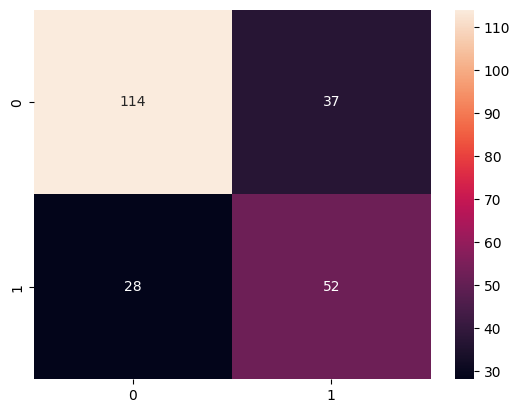

In [60]:
#Accuracy of the model
acc_4 = accuracy_score(y_test, y_pred_4)
print("Accuracy: ", acc_4)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_4 = confusion_matrix(y_test, y_pred_4)
print("Confusion Matrix: \n", cm_4)

#visualize the confusion matrix
import seaborn as sns
sns.heatmap(cm_4, annot=True, fmt = 'd')



In [61]:
#Compare all the algorithm
print("Accuracy of Random Forest: ", acc)
print("Accuracy of Gradient Boosting: ", acc_2)
print("Accuracy of Adaboost Classifier: ", acc_3)
print("Accuracy of XGBoost Classifier: ", acc_4)


Accuracy of Random Forest:  0.7532467532467533
Accuracy of Gradient Boosting:  0.7359307359307359
Accuracy of Adaboost Classifier:  0.7489177489177489
Accuracy of XGBoost Classifier:  0.7186147186147186


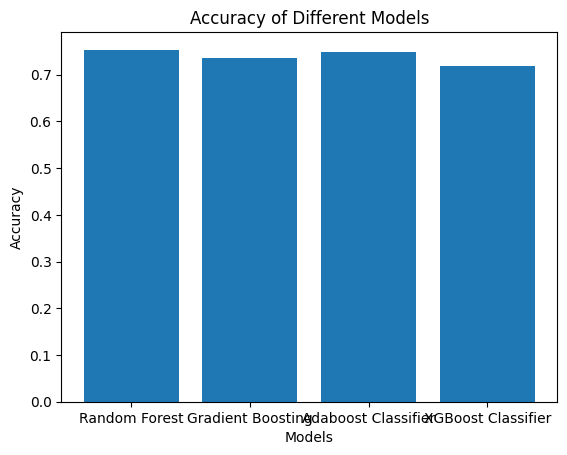

In [62]:
#Visualize the Accuracy of all the model
import matplotlib.pyplot as plt
models = ['Random Forest', 'Gradient Boosting', 'Adaboost Classifier', 'XGBoost Classifier']
accuracy = [acc, acc_2, acc_3, acc_4]
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()